In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Data Augmentation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [3]:
def plotImage(images_arr):
    """
    This function will plot images in the form of a grid with 1 row and 10 columns
    """
    fix, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [59]:
gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
                        channel_shift_range=10., horizontal_flip=True)

In [60]:
chosen_image = random.choice(os.listdir('../data/dogs-vs-cats/train/dog'))

In [61]:
image_path = '../data/dogs-vs-cats/train/dog/' + chosen_image

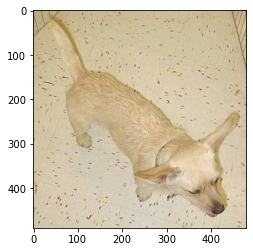

In [62]:
# obtain image
image = np.expand_dims(plt.imread(image_path), 0)
plt.imshow(image[0])

In [63]:
#genearte bathces of augmented images  from this chosen image
aug_iter = gen.flow(image)

In [64]:
# get 10 samples of augmented iamges
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

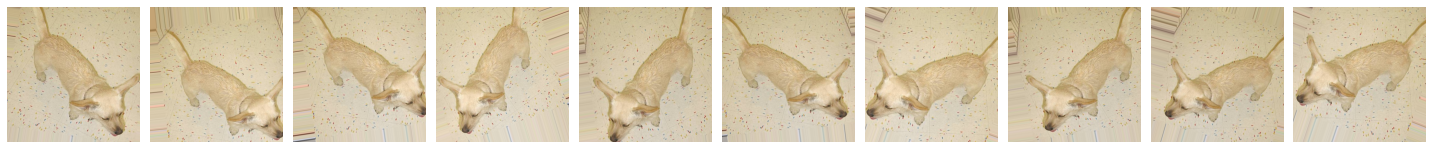

In [65]:
# Augmented Images
plotImage(aug_images)

# Save augmented data

In [69]:
aug_iter = gen.flow(image, save_to_dir='../data/dogs-vs-cats/augmented', save_prefix='aug-image-', save_format='jpeg')

In [72]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]